Компания планирует запустить новую акцию, чтобы продать как можно больше туров. Команда разработала два варианта посадочной страницы.

Стоимость туров:

- Таиланд — 100000 рублей;
- Турция — 60000 рублей;
- Мальдивы — 200000 рублей;
- Санкт-Петербург — 10000 рублей;
- Камчатка — 150000 рублей.

Проверьте, какая из страниц приносит больше покупок.

ЗАДАЧИ
1. Провести первичный анализ датасета. В рамках этой задачи вам предстоит:

- привести столбцы к корректным типам данных;
- убедиться, что данные по обеим группам представлены за одинаковый период (визуализировать);
- проверить корректность распределения участников теста;
- проверить различие в группах;
- проверить пересечение аудитории в группах;
- определить по группам ряд показателей (количество пользователей, количество покупок, выручку, конверсию, средний чек);
- посмотреть, как распределяются суммы покупок (здесь необходимо повизуализировать);
- сделать первичные выводы.
2. Рассчитайте кумулятивные метрики:
- постройте график конверсии в группах по дням;
- постройте график среднего чека в группах по дням;
- постройте график кумулятивных метрик по конверсии и по среднему чеку;
- сделайте выводы.
3. Проведите статистическую проверку гипотез:
- о равенстве конверсии;
- о равенстве выручки;
- о равенстве средних чеков по дням.
4. Сделайте вывод.

In [59]:
import pandas as pd
import scipy.stats as st 
import matplotlib.pyplot as plt
import math


In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  294478 non-null  int64 
 1   user_id     294478 non-null  int64 
 2   date        294478 non-null  object
 3   group       294478 non-null  object
 4   purchase    294478 non-null  int64 
 5   price       294478 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.5+ MB


Приводим столбец "date" к типу "datetime64[ns]"

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.head()

,Unnamed: 0,user_id,date,group,purchase,price
0,0,851104,2021-01-21,A,0,0
1,1,804228,2021-01-12,A,0,0
2,2,661590,2021-01-11,B,0,0
3,3,853541,2021-01-08,B,0,0
4,4,864975,2021-01-21,A,1,150000


In [6]:
df['date'].describe()

C:\Users\Raptor\AppData\Local\Temp\ipykernel_18472\801468514.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                  294478
unique                     23
top       2021-01-08 00:00:00
freq                    13564
first     2021-01-02 00:00:00
last      2021-01-24 00:00:00
Name: date, dtype: object

In [7]:
df.groupby('group').agg({'user_id': 'count'})

,user_id
group,
A,147202
B,147276


Находим пользавателей которые находятся в обоих группах

In [8]:
df_del = df.groupby(['user_id']).agg({'group': 'nunique'}).reset_index()

больше 1 группы на пользователе

In [9]:
df_del = df_del[df_del['group']>1]

In [10]:
df_del

,user_id,group
281,630320,2
726,630805,2
787,630871,2
802,630887,2
911,631008,2
...,...,...
289917,945272,2
289952,945308,2
290010,945369,2
290025,945387,2


In [11]:
delete_list = df_del['user_id'].unique()

Столько дубликатов

In [12]:
len(delete_list)

1895

Удаляем их

In [13]:
df_clear = df[~(df['user_id'].isin(delete_list))]

Пользователей после исключения

In [14]:
df_clear.groupby('group').agg({'user_id': 'count'}).reset_index()

,group,user_id
0,A,145307
1,B,145381


In [15]:
1 - (df_clear.groupby('group').agg({'user_id': 'count'}).reset_index()['user_id'][0] / df_clear.groupby('group').agg({'user_id': 'count'}).reset_index()['user_id'][1])

0.0005090073668498896

разница 0,051%, что меньше 1% - продолжаем

In [16]:
df_clear.columns

Index(['Unnamed: 0', 'user_id', 'date', 'group', 'purchase', 'price'], dtype='object')

Собираем показатели конверсии и среднего чека по каждой группе


In [17]:
df_groups = df_clear.groupby('group').agg({'user_id': 'count', 'purchase': 'sum', 'price': 'sum'}).reset_index()

Добавляем конверсию и средний чек по группам

In [18]:
df_groups['conversion'] = df_groups['purchase'] / df_groups['user_id']
df_groups['avg_check'] = df_groups['price'] / df_groups['purchase']


In [19]:
df_groups

,group,user_id,purchase,price,conversion,avg_check
0,A,145307,17487,1417780000,0.120345,81076.228055
1,B,145381,17290,1533010000,0.118929,88664.545980


In [21]:
df_a = df_clear[df_clear['group']=='A']
df_b = df_clear[df_clear['group']=='B']

In [29]:
df_a

,Unnamed: 0,user_id,date,group,purchase,price
0,0,851104,2021-01-21,A,0,0
1,1,804228,2021-01-12,A,0,0
4,4,864975,2021-01-21,A,1,150000
5,5,936923,2021-01-10,A,0,0
7,7,719014,2021-01-17,A,0,0
...,...,...,...,...,...,...
294471,294471,718310,2021-01-21,A,0,0
294473,294473,751197,2021-01-03,A,0,0
294474,294474,945152,2021-01-12,A,0,0
294475,294475,734608,2021-01-22,A,0,0


<AxesSubplot:>

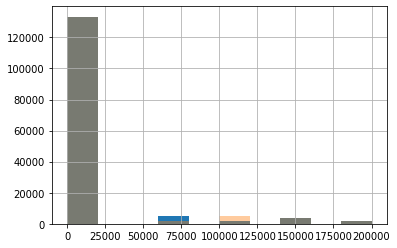

In [31]:
df_a['price'].hist()
df_b['price'].hist(alpha=0.4)

#### Создайте кумулятивную таблицу
Есть несколько способов создать кумулятивную таблицу.

Воспользуйтесь одним из них и создайте кумулятивную таблицу для каждой из групп, так чтобы в ней были представлены следующие данные:

* дата;
* количество пользователей (кумулятивное);
* количество заказов (кумулятивное);
* выручка (кумулятивная).

In [43]:
def cummulative_table(data): # В переменную data будем передавать название переменной датафейма
    df_cumm = [] # Создаём пустой список
    for i in data['date'].values: # Запускаем цикл по каждому отдельному значению даты
        out = data[data['date'] <= i].groupby('group')\
               .agg({'date':'max', 'user_id':'sum', 'purchase':'sum', 'price': 'sum'})
        df_cumm.append(out) # Полученный срез добавляем в созданный ранее список
    return pd.concat(df_cumm).reset_index() # Объединяем списки и возвращаем результат

In [34]:
df_a = df_a.sort_values('date')
df_b = df_b.sort_values('date')

In [36]:
dfa_piv = df_a.groupby(['date','group']).agg({'user_id':'count', 'purchase':'sum', 'price':'sum'}).reset_index()
dfb_piv = df_b.groupby(['date','group']).agg({'user_id':'count', 'purchase':'sum', 'price':'sum'}).reset_index()

In [44]:
cumm_a = cummulative_table(dfa_piv)
cumm_b = cummulative_table(dfb_piv)

In [46]:
cumm_a['conversion'] = cumm_a['purchase'] / cumm_a['user_id']
cumm_a['avg_check'] = cumm_a['price'] / cumm_a['purchase']

cumm_b['conversion'] = cumm_b['purchase'] / cumm_b['user_id']
cumm_b['avg_check'] = cumm_b['price'] / cumm_b['purchase']

График кумулятивного Среднего Чека по дням

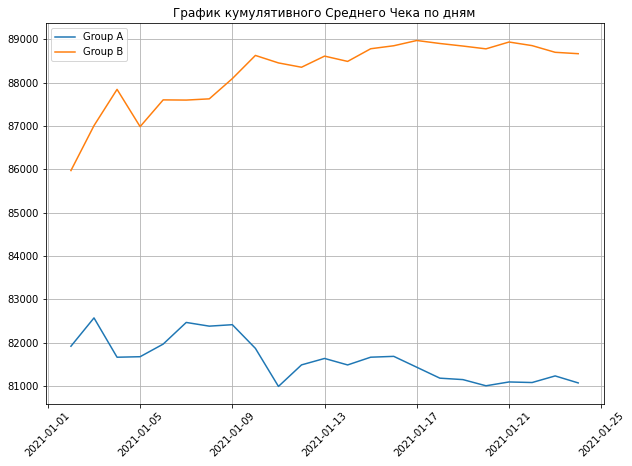

In [49]:
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['avg_check'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['avg_check'], label='Group B')
plt.title('График кумулятивного Среднего Чека по дням')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

График кумулятивной конверсии по дням

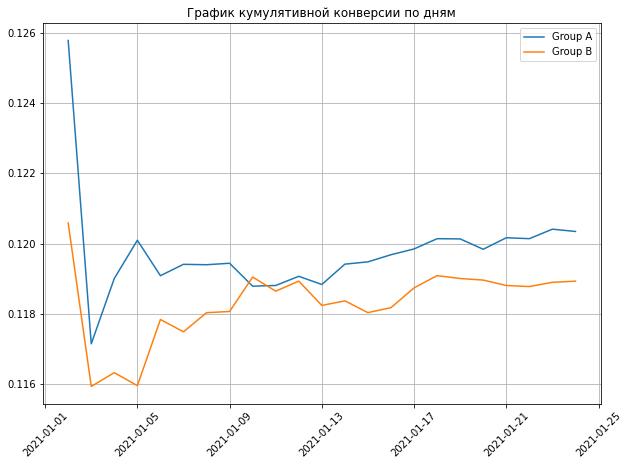

In [50]:
plt.figure(figsize=(10,7))
plt.plot(cumm_a['date'], cumm_a['conversion'], label='Group A')
plt.plot(cumm_b['date'], cumm_b['conversion'], label='Group B')
plt.title('График кумулятивной конверсии по дням')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

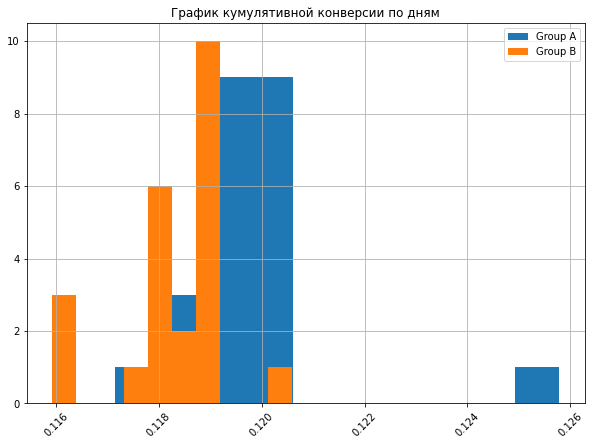

In [54]:
plt.figure(figsize=(10,7))
plt.hist(cumm_a['conversion'], label='Group A')
plt.hist(cumm_b['conversion'], label='Group B')
plt.title('График кумулятивной конверсии по дням')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

Проведите выбранный тест (Z) с уровнем статистической значимости, равным 0.05

In [56]:
cumm_a.tail(1)

,group,date,user_id,purchase,price,conversion,avg_check
22,A,2021-01-24,145307,17487,1417780000,0.120345,81076.228055


In [57]:
cumm_b.tail(1)

,group,date,user_id,purchase,price,conversion,avg_check
22,B,2021-01-24,145381,17290,1533010000,0.118929,88664.54598


In [58]:
a = .05
n1 = 145307
n2 = 145381
x1 = 17487
x2 = 17290

p1 = x1/n1
p2 = x2/n2
p = (x1 + x2) / (n1 + n2)
diff = p1 - p2

Считаем Z

In [60]:
z = diff / math.sqrt(p * (1 - p) * (1/n1 + 1/n2))
print(z)

1.176469036591924


Теперь из полученной Z-статистики рассчитаем p-value при нормальном стандартном распределении.

Зададим нормальное стандартное распределение со средним, равным нулю, и стандартным отклонением, равным единице:

In [61]:
distr = st.norm(0, 1)

In [63]:
p_val = (1 - distr.cdf(abs(z))) * 2
print("p-value:", round(p_val, 3), "больше a",a)

p-value: 0.239 больше a 0.05


P-value больше принятого уровня значимости, следовательно, статистически значимая разница между конверсиями отсутствует.

***
Проверьте различия в стоимости заказов между группами

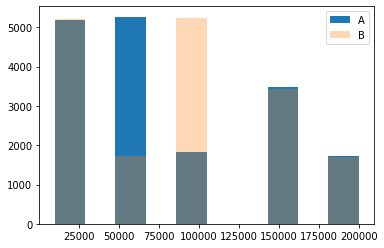

In [64]:
plt.hist(df_a[df_a['purchase']==1]['price'], label='A')
plt.hist(df_b[df_b['purchase']==1]['price'], label='B', alpha=0.3)
plt.legend() 
plt.show() 

Не похоже на нормальное распределение, применяем метод Манна-Уитни

In [67]:
uitni_a = df_a[df_a['purchase']==1]['price']
uitni_b = df_b[df_b['purchase']==1]['price']

In [69]:
alpha = .05
results = st.mannwhitneyu(uitni_a, uitni_b)
print(results)
p_val = results.pvalue/2
print(p_val)

MannwhitneyuResult(statistic=139547139.0, pvalue=2.825361345286736e-37)
1.412680672643368e-37


In [70]:
print(p_val < alpha)

False


Есть существенная разница, отвергаем нулевую гипотезу: стоимости заказов не равны.

Ранее вы делали таблицу, в которой собирали показатель среднего чека по каждому дню (не кумулятивный). Проверьте различие средних чеков по дням. Постройте гистограмму.

In [73]:
dfa_piv['avg_chk'] = dfa_piv['price'] / dfa_piv['purchase']
dfb_piv['avg_chk'] = dfb_piv['price'] / dfb_piv['purchase']

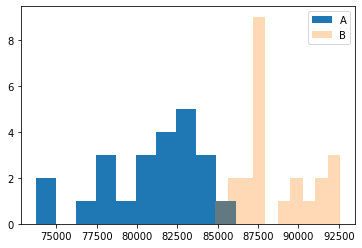

In [74]:
plt.hist(dfa_piv['avg_chk'], label='A')
plt.hist(dfb_piv['avg_chk'], label='B', alpha=0.3)
plt.legend() 
plt.show() 

Похоже на нормальное распределение, проводим Т-Тест

In [75]:
dfa_p = dfa_piv['avg_chk']
dfb_p = dfb_piv['avg_chk']

In [76]:
alpha = 0.05
results = st.ttest_ind(dfa_p, dfb_p, equal_var = True)
print(results)

Ttest_indResult(statistic=-9.609061044565284, pvalue=2.2523589349617907e-12)


In [77]:
if (results.pvalue < alpha):
   print("Отвергаем нулевую гипотезы - Cредние баллы не равны")
else:
   print("Не отвергаем нулевую гипотезу - Средние баллы обеих групп равны")

Отвергаем нулевую гипотезы - Cредние баллы не равны


Несмотря на то что конверсия группы B ниже, статистической значимости в конверсии не достигнуто, соответственно, считать конверсии разными оснований нет. Зато средний чек группы B значительно выше среднего чека группы A. Статистическая значимость достигнута. Вариант сайта B приносит значимо больше выручки, чем вариант сайта A. Рекомендуем признать, что вариант B лучше, чем вариант A! верно